In [63]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import datamol as dm
import numpy as np
from medchem.utils import graph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Testing the Symmetry function

In [12]:
#! pip install networkx

In [73]:
smiles = [
 'CC(C)(C)',
 'NC(C)(C)C',
 'NC(C)(N)C',
 'CCCC1=CNC(CC)=C1C',
 'Cl.CC([O-])=O.CCCC1=CNC=C1CCC',
 'Cl.[O-]C(=O)CC([O-])=O.CCCC1=CNC=C1CCC',
 '[O-]C(=O)C1=CC=CC=C1.CCCC1=CNC=C1CCC',
 
 'CCn1cc(S(=O)(=O)n2cc(Cl)cn2)cn1',
 'CCCC1CCC([C@H]2CC[C@H](C(=O)O)CC2)CC1',
 'Cc1cc(C)c(S(=O)(=O)Nc2cc(C)ccc2C)c(C)c1',

 'c1ccc(CCC2CCN(CCC3COCCO3)CC2)cc1',
 'O=C(O)c1cc(-n2ccnc2)cc(-n2ccnc2)c1',
 'OC(O)c1cc(-n2ccnc2)cc(-n2ccnc2)c1',
 'c1ccc2oc(-c3ccc(-c4nc5ccccc5o4)s3)nc2c1',

 'CC(C)(C)[C@@H]1COC(C2(C3=N[C@H](C(C)(C)C)CO3)Cc3ccccc3C2)=N1',
 'Cc1cc(O)c(C(c2ccc(Cl)cc2)c2c(O)cc(C)[nH]c2=O)c(=O)[nH]1',
]

In [74]:
res = [graph.score_symmetry(x, exclude_self_mapped_edged=False) for x in smiles]
mols = [dm.to_mol(x) for x in smiles]
inds = np.argsort(res)
res = [res[i] for i in inds]
mols = [mols[i] for i in inds]

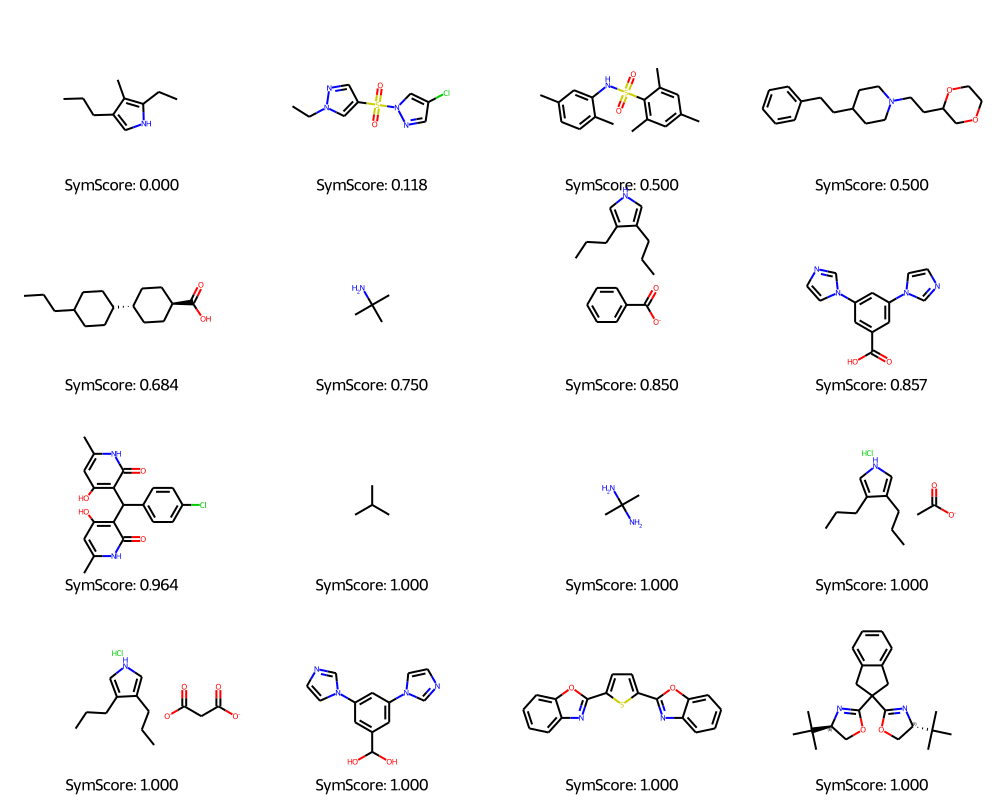

In [75]:
dm.to_image(mols, legends=[f"SymScore: {x:.3f}" for x in res], n_cols=4, mol_size=(250, 200))

#### Effect of exclusion of edge only mapped to themselves in the automorphism

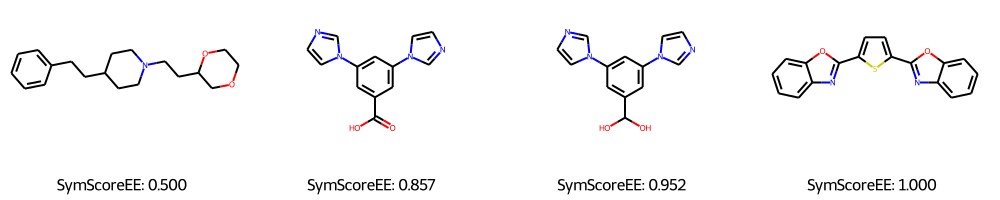

In [79]:
# Score when we exclude self mapped edges
res = [graph.score_symmetry(x, exclude_self_mapped_edged=True) for x in smiles[-6:-2]]
mols = [dm.to_mol(x) for x in smiles[-6:-2]]
dm.to_image(mols, legends=[f"SymScoreEE: {x:.3f}" for x in res], n_cols=4, mol_size=(250, 200))

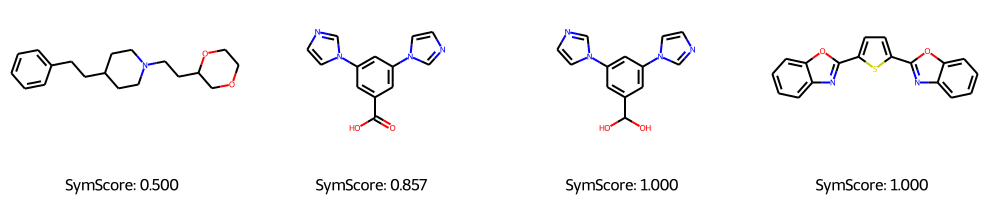

In [80]:
# Score when we exclude self mapped edges
res = [graph.score_symmetry(x, exclude_self_mapped_edged=False) for x in smiles[-6:-2]]
mols = [dm.to_mol(x) for x in smiles[-6:-2]]
dm.to_image(mols, legends=[f"SymScore: {x:.3f}" for x in res], n_cols=4, mol_size=(250, 200))